# Reshaping

In [1]:
import pandas as pd

In [2]:
olympics_df = pd.read_csv('../olympics.csv', skiprows=4)
olympics_df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


### Plot the number of gold medals won by the USA male and female athletes
### throughout the history of the olympics

In [4]:
# Whic hAthletes are from USA and won Gold medal
gold_medal_df = olympics_df[(olympics_df.NOC == 'USA') & (olympics_df.Medal == 'Gold')]
gold_medal_df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
27,Athens,1896,Athletics,Athletics,"GARRETT, Robert",USA,Men,discus throw,M,Gold
29,Athens,1896,Athletics,Athletics,"CLARK, Ellery",USA,Men,high jump,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29048,Beijing,2008,Volleyball,Volleyball,"ROONEY, Sean",USA,Men,volleyball,M,Gold
29049,Beijing,2008,Volleyball,Volleyball,"SALMON, Riley",USA,Men,volleyball,M,Gold
29050,Beijing,2008,Volleyball,Volleyball,"STANLEY, Clayton",USA,Men,volleyball,M,Gold
29051,Beijing,2008,Volleyball,Volleyball,"TOUZINSKY, Scott",USA,Men,volleyball,M,Gold


In [8]:
# Athletes across the history of the olympics
gold_medal_df.groupby(['Edition', 'Gender']).size()

Edition  Gender
1896     Men        11
1900     Men        26
         Women       1
1904     Men       140
         Women       6
1908     Men        34
1912     Men        45
1920     Men       103
         Women       7
1924     Men        95
         Women      15
1928     Men        34
         Women       9
1932     Men        61
         Women      17
1936     Men        44
         Women       7
1948     Men        75
         Women       8
1952     Men        72
         Women       7
1956     Men        57
         Women       4
1960     Men        51
         Women      17
1964     Men        63
         Women      15
1968     Men        59
         Women      24
1972     Men        37
         Women      16
1976     Men        56
         Women       7
1984     Men       106
         Women      62
1988     Men        49
         Women      28
1992     Men        57
         Women      32
1996     Men        59
         Women     101
2000     Men        68
         Women    

In [11]:
# unstack gender|
gold_medal_df.groupby(['Edition', 'Gender']).size().unstack('Gender', fill_value=0)

Gender,Men,Women
Edition,,
1896,11,0
1900,26,1
1904,140,6
1908,34,0
1912,45,0
1920,103,7
1924,95,15
1928,34,9
1932,61,17


<Axes: xlabel='Edition'>

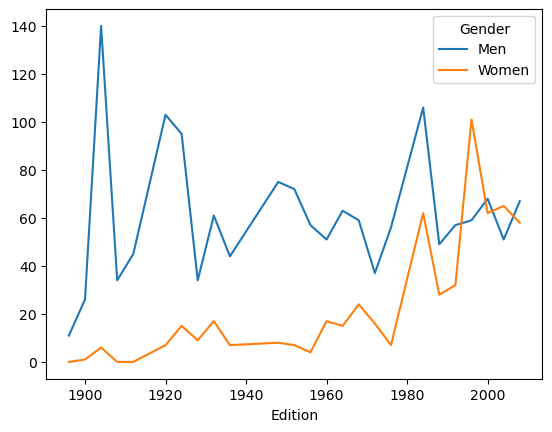

In [12]:
gold_medal_df.groupby(['Edition', 'Gender']).size().unstack('Gender', fill_value=0).plot()

### Plt the 5 athletes who have won the most gold medals over the history 
### of the Olympics. 
### When there is a tie, consider the number of silver medals, then bronze medals

In [13]:
olympics_df.groupby(['Athlete', 'Medal']).size()

Athlete                    Medal 
AABYE, Edgar               Gold      1
AALTONEN, Arvo Ossian      Bronze    2
AALTONEN, Paavo Johannes   Bronze    2
                           Gold      3
AAMODT, Ragnhild           Gold      1
                                    ..
ÖSTERVOLD, Kristian Olsen  Gold      1
ÖSTERVOLD, Ole Olsen       Gold      1
ÖSTMO, Ole                 Bronze    2
                           Silver    2
ÖSTRAND, Per-Olof          Bronze    1
Length: 25127, dtype: int64

In [15]:
group_df = olympics_df.groupby(['Athlete', 'Medal']).size().unstack('Medal', fill_value=0)
group_df

Medal,Bronze,Gold,Silver
Athlete,,,
"AABYE, Edgar",0,1,0
"AALTONEN, Arvo Ossian",2,0,0
"AALTONEN, Paavo Johannes",2,3,0
"AAMODT, Ragnhild",0,1,0
"AANING, Alf Lied",0,0,1
...,...,...,...
"ÖSTERVOLD, Jan Olsen",0,1,0
"ÖSTERVOLD, Kristian Olsen",0,1,0
"ÖSTERVOLD, Ole Olsen",0,1,0


In [17]:
group_df.sort_values(['Gold', 'Silver', 'Bronze'])

Medal,Bronze,Gold,Silver
Athlete,,,
"AARDENBURG, Willemien",1,0,0
"AARONES, Ann Kristin",1,0,0
"ABAJO, Jose Luis",1,0,0
"ABASCAL GOMEZ, Jose Manuel",1,0,0
"ABAY-NEMES, Oszkar",1,0,0
...,...,...,...
"LEWIS, Carl",0,9,1
"SPITZ, Mark",1,9,1
"NURMI, Paavo",0,9,3


In [18]:
group_df.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)

Medal,Bronze,Gold,Silver
Athlete,,,
"PHELPS, Michael",2,14,0
"LATYNINA, Larisa",4,9,5
"NURMI, Paavo",0,9,3
"SPITZ, Mark",1,9,1
"LEWIS, Carl",0,9,1
...,...,...,...
"ZYCH, Boguslaw",1,0,0
"ZÄHRINGER, Klaus",1,0,0
"ZÜHLKE, Steffen",1,0,0


In [21]:
group_df.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']]

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


In [23]:
group_df.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].head()

Medal,Gold,Silver,Bronze
Athlete,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


<Axes: xlabel='Athlete'>

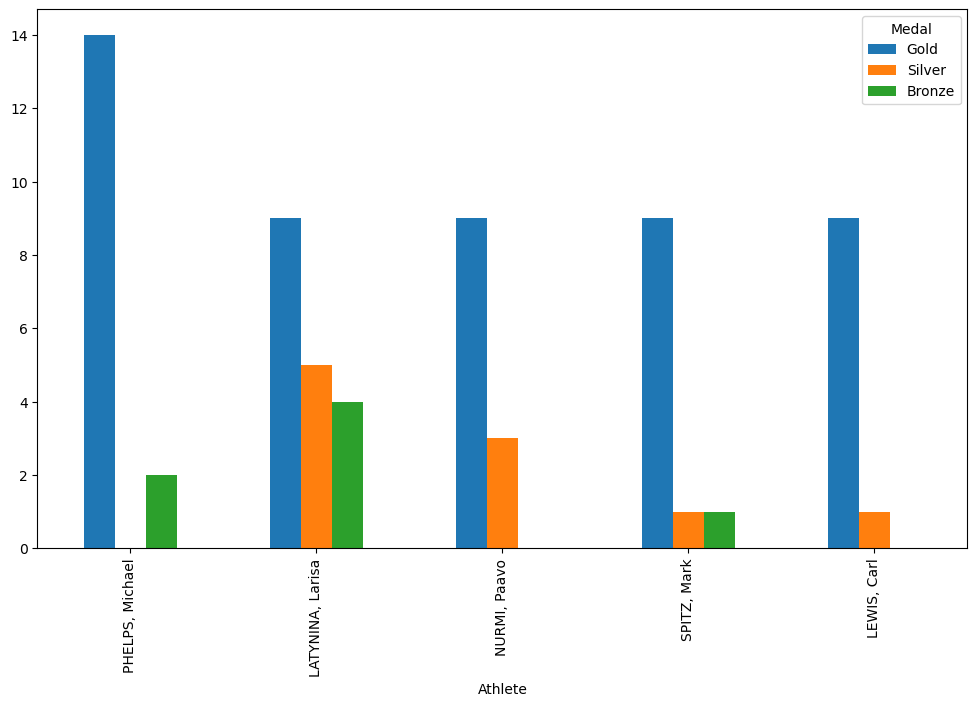

In [35]:
group_df.sort_values(['Gold', 'Silver', 'Bronze'], ascending=False)[['Gold', 'Silver', 'Bronze']].head().plot(kind='bar', figsize=(12,7))